# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Base URL to pull from:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

cities_list = []


for index, city in enumerate(cities):
    try: 
            if (index <50):
                print(f'Processing Record {index + 1} of Set {1}'\
                 f' | {city}')
            if (index<100) & (index>50):
                print(f'Processing Record {index + 1} of Set {2}'\
                f' | {city}')
            if (index<150) & (index>100):
                print(f'Processing Record {index + 1} of Set {3}'\
                f' | {city}')
            if (index<200) & (index>150):
                print(f'Processing Record {index + 1} of Set {4}'\
                 f' | {city}')
            if (index<250) & (index>200):
                print(f'Processing Record {index + 1} of Set {5}'\
                 f' | {city}')
            if (index<300) & (index>250):
                print(f'Processing Record {index + 1} of Set {6}'\
                 f' | {city}')
            if (index<350) & (index>300):
                print(f'Processing Record {index + 1} of Set {7}'\
                 f' | {city}')
            if (index<400) & (index>350):
                print(f'Processing Record {index + 1} of Set {8}'\
                 f' | {city}')
            if (index<450) & (index>400):
                print(f'Processing Record {index + 1} of Set {9}'\
                 f' | {city}')
            if (index<500) & (index>450):
                print(f'Processing Record {index + 1} of Set {10}'\
                 f' | {city}')
            if (index<550) & (index>500):
                print(f'Processing Record {index + 1} of Set {11}'\
                 f' | {city}')
            if (index<600) & (index>550):
                print(f'Processing Record {index + 1} of Set {12}'\
                 f' | {city}')
    
    #URL per city            
            city_url = url + "&q=" + city 
    
    
    #Retrieve data
            city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

        # Append the City information into city_data list
            cities_list.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date}) 
    except:
        print("City not found. Skipped...")
    pass


Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | port hardy
Processing Record 5 of Set 1 | vanderhoof
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | amderma
City not found. Skipped...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipped...
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | caetite
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | kemijarvi
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | lyman
Processing Record 21 of Set 1 | gidole
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | ushuaia
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(city_weather)

{'coord': {'lon': 118.9636, 'lat': 42.2683}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 74.97, 'feels_like': 73.15, 'temp_min': 74.97, 'temp_max': 74.97, 'pressure': 1003, 'humidity': 21, 'sea_level': 1003, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 10.04, 'deg': 290, 'gust': 15.28}, 'clouds': {'all': 0}, 'dt': 1623899497, 'sys': {'country': 'CN', 'sunrise': 1623875229, 'sunset': 1623930175}, 'timezone': 28800, 'id': 2038067, 'name': 'Chifeng', 'cod': 200}


In [6]:
city_df = pd.DataFrame(cities_list)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,61.00,75,40,6.46,ZA,1623899274
1,vaini,-21.2000,-175.2000,75.36,94,75,5.75,TO,1623899274
2,mataura,-46.1927,168.8643,46.47,89,87,2.91,NZ,1623899275
3,port hardy,50.6996,-127.4199,56.55,81,90,10.22,CA,1623899275
4,vanderhoof,54.0166,-124.0198,62.35,41,67,11.65,CA,1623899275


In [7]:
city_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [8]:
city_df.to_csv("WeatherHW.csv", index = False)

In [9]:
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,61.00,75,40,6.46,ZA,1623899274
1,vaini,-21.2000,-175.2000,75.36,94,75,5.75,TO,1623899274
2,mataura,-46.1927,168.8643,46.47,89,87,2.91,NZ,1623899275
3,port hardy,50.6996,-127.4199,56.55,81,90,10.22,CA,1623899275
4,vanderhoof,54.0166,-124.0198,62.35,41,67,11.65,CA,1623899275
...,...,...,...,...,...,...,...,...,...
550,tanout,14.9709,8.8879,79.88,49,79,7.43,NE,1623899495
551,hamilton,39.1834,-84.5333,67.21,68,1,0.00,US,1623899297
552,yeppoon,-23.1333,150.7333,76.78,67,19,4.72,AU,1623899496
553,bambey,14.6955,-16.4493,74.17,80,62,7.90,SN,1623899496


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.133017,14.654829,67.163153,69.632432,56.284685,7.794667,1.623899e+09
std,33.185515,92.761736,14.446376,20.734222,39.890804,5.586228,7.979107e+01
min,-54.800000,-179.166700,22.950000,10.000000,0.000000,0.000000,1.623899e+09
25%,-8.304600,-68.359750,57.670000,60.000000,11.000000,3.690000,1.623899e+09
50%,24.383300,21.036700,68.880000,75.000000,67.000000,6.510000,1.623899e+09
75%,47.735450,95.845700,78.540000,84.000000,98.000000,10.370000,1.623899e+09
max,78.218600,178.416700,106.270000,100.000000,100.000000,30.240000,1.623899e+09


In [11]:
#NO City with humidity above 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

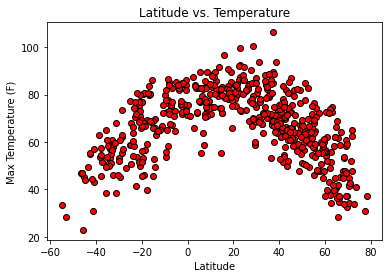

In [12]:
latitude = city_df["Lat"]
temperature = city_df["Max Temp"]
#Plot the lat vs max temp
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.scatter(latitude, temperature, color = "red", edgecolors = "black")
plt.savefig("../output_data/Fig1.png")
plt.show

In the plot above we see the correlation between the latitude of a city and their respective highest recorded temperature. We can clearly see that the highest temperatures are recorded nearest the latitude value of zero in an upside down parabola. We can understand this correlation in a higher level by understanding that the latitude value of zero represents the Equator while the outter extremities are the North and South Poles.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

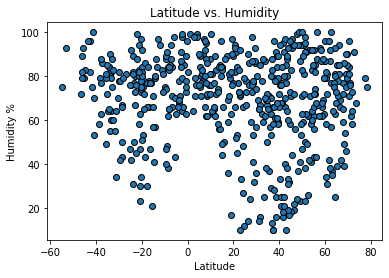

In [13]:
humidity = city_df["Humidity"]

plt.xlabel("Latitude"),
plt.ylabel("Humidity %"),
plt.title("Latitude vs. Humidity"),
plt.scatter(latitude, humidity, edgecolors= "black"),
plt.savefig("../output_data/Fig2.png")
plt.show


There seems to be more humidity in cities with a negative Latitude value with all values plotted having more than 25 percent humidity. The cities with a positive latitude tend to have a much more spread out range of humidity percentages but many of them do fall under the 25% value. In essence, there is usually more rain in the Southern Hemisphere or at least more humidity.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

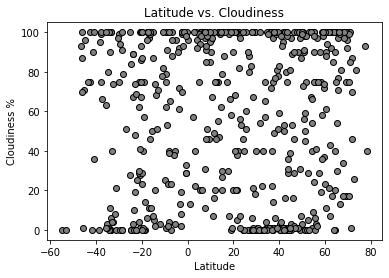

In [14]:
cloudiness = city_df["Cloudiness"]

plt.xlabel("Latitude"),
plt.ylabel("Cloudiness %"),
plt.title("Latitude vs. Cloudiness"),
plt.scatter(latitude, cloudiness, color = "gray", edgecolors = "black"),
plt.savefig("../output_data/Fig3.png")
plt.show

No apparent correlation can be determined between latitude and cloudiness!

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

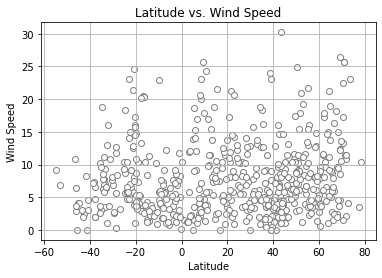

In [15]:
wind_speed = city_df["Wind Speed"]

plt.xlabel("Latitude"),
plt.ylabel("Wind Speed"),
plt.title("Latitude vs. Wind Speed"),
plt.scatter(latitude, wind_speed, color = "white", edgecolors = "gray"),
plt.grid(),
plt.savefig("../output_data/Fig4.png")
plt.show

Most cities do not experience high wind speeds and typically fall under a value of 12. There is a good amount of cities with higher wind speed values but they are not as prevalent. Ultimately, there is no correlation between latitude and wind speed.

## Linear Regression

In [16]:
#Separate Northern and Southern hemispheres

north_df = city_df.loc[(city_df["Lat"] > 0)].dropna()
south_df = city_df.loc[(city_df["Lat"] < 0)].dropna()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is:  -0.7186705592084149
Temperature has a negative Linear Regression correlation with latitude. As you travel higher North the temperature decreases!


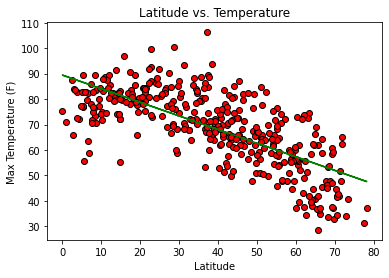

In [17]:
northlat = north_df["Lat"]
northtemp = north_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northlat, northtemp)
print("The r value is: ", rvalue)
line_eq = northlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.scatter(northlat, northtemp, color = "red", edgecolors = "black")
plt.plot(northlat, line_eq, color = "green")
plt.show

print("Temperature has a negative Linear Regression correlation with latitude. As you travel higher North the temperature decreases!" )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is:  0.7325285482293964
Temperature has a positive Linear Regression correlation with latitude. As you travel towards the Equator the temperature increases!


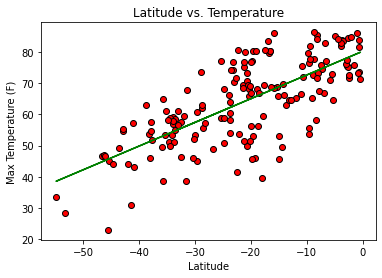

In [18]:
southlat = south_df["Lat"]
southtemp = south_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southtemp)
print("The r value is: ", rvalue)
line_eq2 = southlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.scatter(southlat, southtemp, color = "red", edgecolors = "black")
plt.plot(southlat, line_eq2, color = "green")
plt.show

print("Temperature has a positive Linear Regression correlation with latitude. As you travel towards the Equator the temperature increases!" )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is:  -0.07607499766730255
Humidity has a slightly negative Linear Regression correlation with latitude. As you travel higher North the humidity decreases!


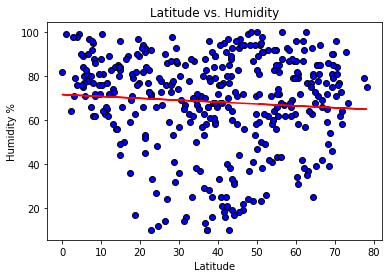

In [19]:
northhum = north_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northlat, northhum)
print("The r value is: ", rvalue)
line_eq3 = northlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")
plt.scatter(northlat, northhum, color = "blue", edgecolors = "black")
plt.plot(northlat, line_eq3, color = "red")
plt.show

print("Humidity has a slightly negative Linear Regression correlation with latitude. As you travel higher North the humidity decreases!" )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is:  -0.021116544560387706
Humidity has no correlation with latitude!


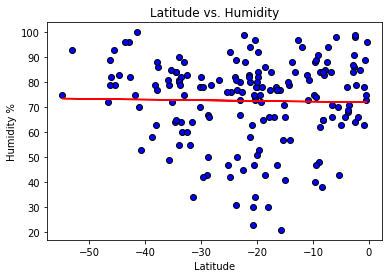

In [20]:
southhum = south_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southhum)
print("The r value is: ", rvalue)
line_eq = southlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")
plt.scatter(southlat, southhum, color = "blue", edgecolors = "black")
plt.plot(southlat, line_eq, color = "red")
plt.show

print("Humidity has no correlation with latitude!" )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is:  -0.005233093897629438
Humidity has a slightly negative Linear Regression correlation with latitude. As you travel higher North the cloudiness decreases!


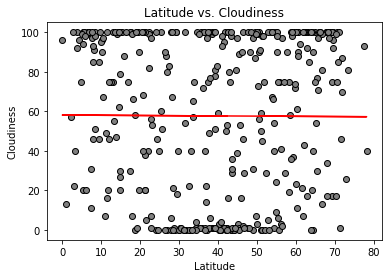

In [21]:
northclo = north_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northlat, northclo)
print("The r value is: ", rvalue)
line_eq = northlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.scatter(northlat, northclo, color = "gray", edgecolors = "black")
plt.plot(northlat, line_eq, color = "red")
plt.show

print("Humidity has a slightly negative Linear Regression correlation with latitude. As you travel higher North the cloudiness decreases!" )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is:  0.08375588847890966
Humidity has a slightly positive Linear Regression correlation with latitude. As you travel North to the Equator the cloudiness increases!


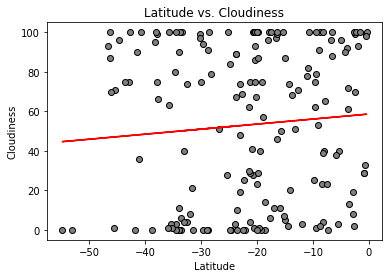

In [22]:
southclo = south_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southclo)
print("The r value is: ", rvalue)
line_eq = southlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.scatter(southlat, southclo, color = "gray", edgecolors = "black")
plt.plot(southlat, line_eq, color = "red")
plt.show

print("Humidity has a slightly positive Linear Regression correlation with latitude. As you travel North to the Equator the cloudiness increases!" )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is:  0.07033977263675882
Humidity has a slightly positive Linear Regression correlation with latitude. As you travel higher North the wind speed in cities increases!


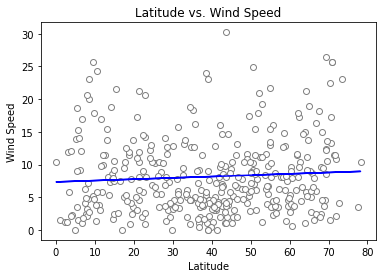

In [23]:
northWS = north_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northlat, northWS)
print("The r value is: ", rvalue)
line_eq = northlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.scatter(northlat, northWS, color = "white", edgecolors = "gray")
plt.plot(northlat, line_eq, color = "blue")
plt.show

print("Humidity has a slightly positive Linear Regression correlation with latitude. As you travel higher North the wind speed in cities increases!" )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is:  -0.047300080568218085
Humidity has a negative Linear Regression correlation with latitude. As you travel North toward the Equator the wind speed in cities decreases!


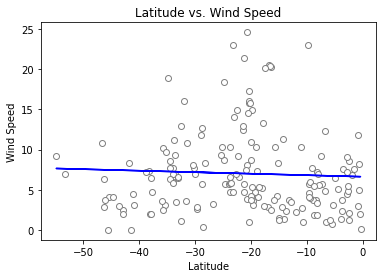

In [24]:
southWS = south_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southWS)
print("The r value is: ", rvalue)
line_eq = southlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.scatter(southlat, southWS, color = "white", edgecolors = "gray")
plt.plot(southlat, line_eq, color = "blue")
plt.show

print("Humidity has a negative Linear Regression correlation with latitude. As you travel North toward the Equator the wind speed in cities decreases!" )